In [34]:
import pandas as pd
import copy
import json
import math
import random
import sys
import tempfile
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
%matplotlib notebook
import seaborn as sns; sns.set()
import time

In [2]:
data=pd.read_csv('Mediterraneo.csv')

In [3]:
data.head()

,Unnamed: 0,X,i_mid,i_low,i_high,i_mid_jan,i_low_jan,i_high_jan,i_mid_feb,i_low_feb,...,runoff_aug,runoff_sep,runoff_oct,runoff_nov,runoff_dec,mpw,area,coords.x1,coords.x2,optional
0,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,21753.3,22500000.0,9.812500,37.329167,True
1,2,2,0.117503,0.046447,0.431570,0.008847,0.003387,0.033584,0.025464,0.010425,...,0.075899,0.067729,0.176044,0.588417,0.466081,506114.0,95100000.0,9.387500,37.254167,True
2,3,3,0.004653,0.001518,0.021067,0.000364,0.000116,0.001692,0.000750,0.000250,...,0.135462,0.101813,0.223936,0.821796,0.500808,56294.6,33500000.0,9.804167,37.237500,True
3,4,4,0.163098,0.065719,0.586740,0.019418,0.007780,0.070142,0.041209,0.017347,...,0.182635,0.184765,0.335541,1.101117,0.927117,349409.0,99200000.0,9.229167,37.220833,True
4,5,5,0.038200,0.014144,0.150693,0.003528,0.001281,0.014193,0.008848,0.003407,...,0.105010,0.099647,0.219543,0.728243,0.591818,199000.0,39700000.0,9.254167,37.220833,True


In [22]:
df=pd.DataFrame(data[['i_mid_jan','i_mid_feb','i_mid_mar','i_mid_apr','i_mid_may','i_mid_jun','i_mid_jul','i_mid_aug','i_mid_sep','i_mid_oct','i_mid_nov','i_mid_dec']])
df2=pd.DataFrame(data[['i_low_jan','i_low_feb','i_low_mar','i_low_apr','i_low_may','i_low_jun','i_low_jul','i_low_aug','i_low_sep','i_low_oct','i_low_nov','i_low_dec']])
df3=pd.DataFrame(data[['i_high_jan','i_high_feb','i_high_mar','i_high_apr','i_high_may','i_high_jun','i_high_jul','i_high_aug','i_high_sep','i_high_oct','i_high_nov','i_high_dec']])
df2.head()

,i_low_jan,i_low_feb,i_low_mar,i_low_apr,i_low_may,i_low_jun,i_low_jul,i_low_aug,i_low_sep,i_low_oct,i_low_nov,i_low_dec
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003387,0.010425,0.009296,0.008477,0.003667,0.001395,0.000677,0.000181,0.000146,0.000701,0.004732,0.003361
2,0.000116,0.000250,0.000303,0.000249,0.000116,0.000052,0.000033,0.000013,0.000008,0.000030,0.000236,0.000110
3,0.007780,0.017347,0.012465,0.007672,0.003478,0.001532,0.000794,0.000410,0.000404,0.001091,0.007146,0.005599
4,0.001281,0.003407,0.002781,0.002196,0.000965,0.000387,0.000192,0.000068,0.000060,0.000223,0.001485,0.001099


<IPython.core.display.Javascript object>


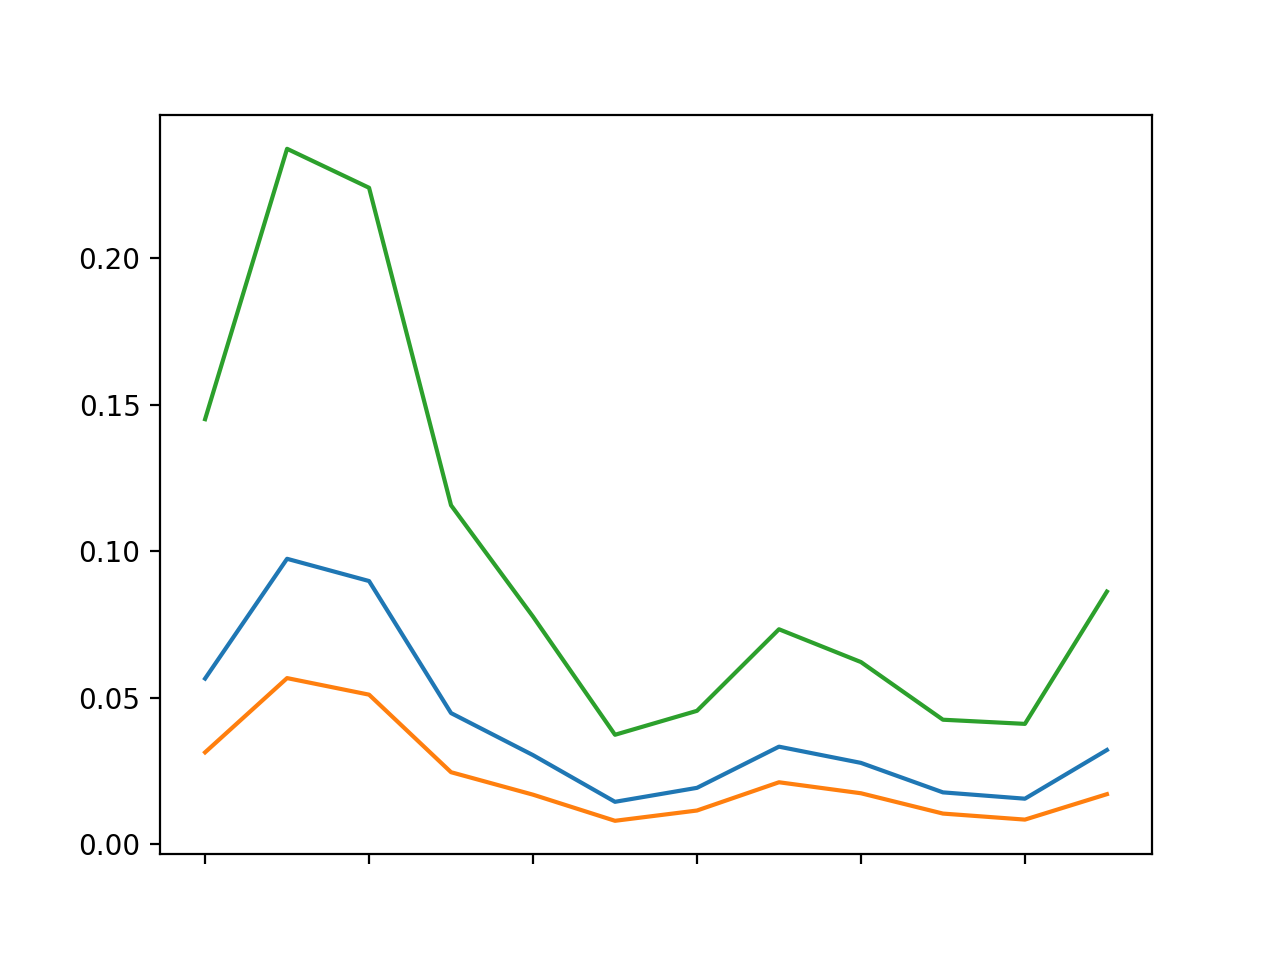

In [24]:
df.mean().plot()
df2.mean().plot()
df3.mean().plot()

<IPython.core.display.Javascript object>


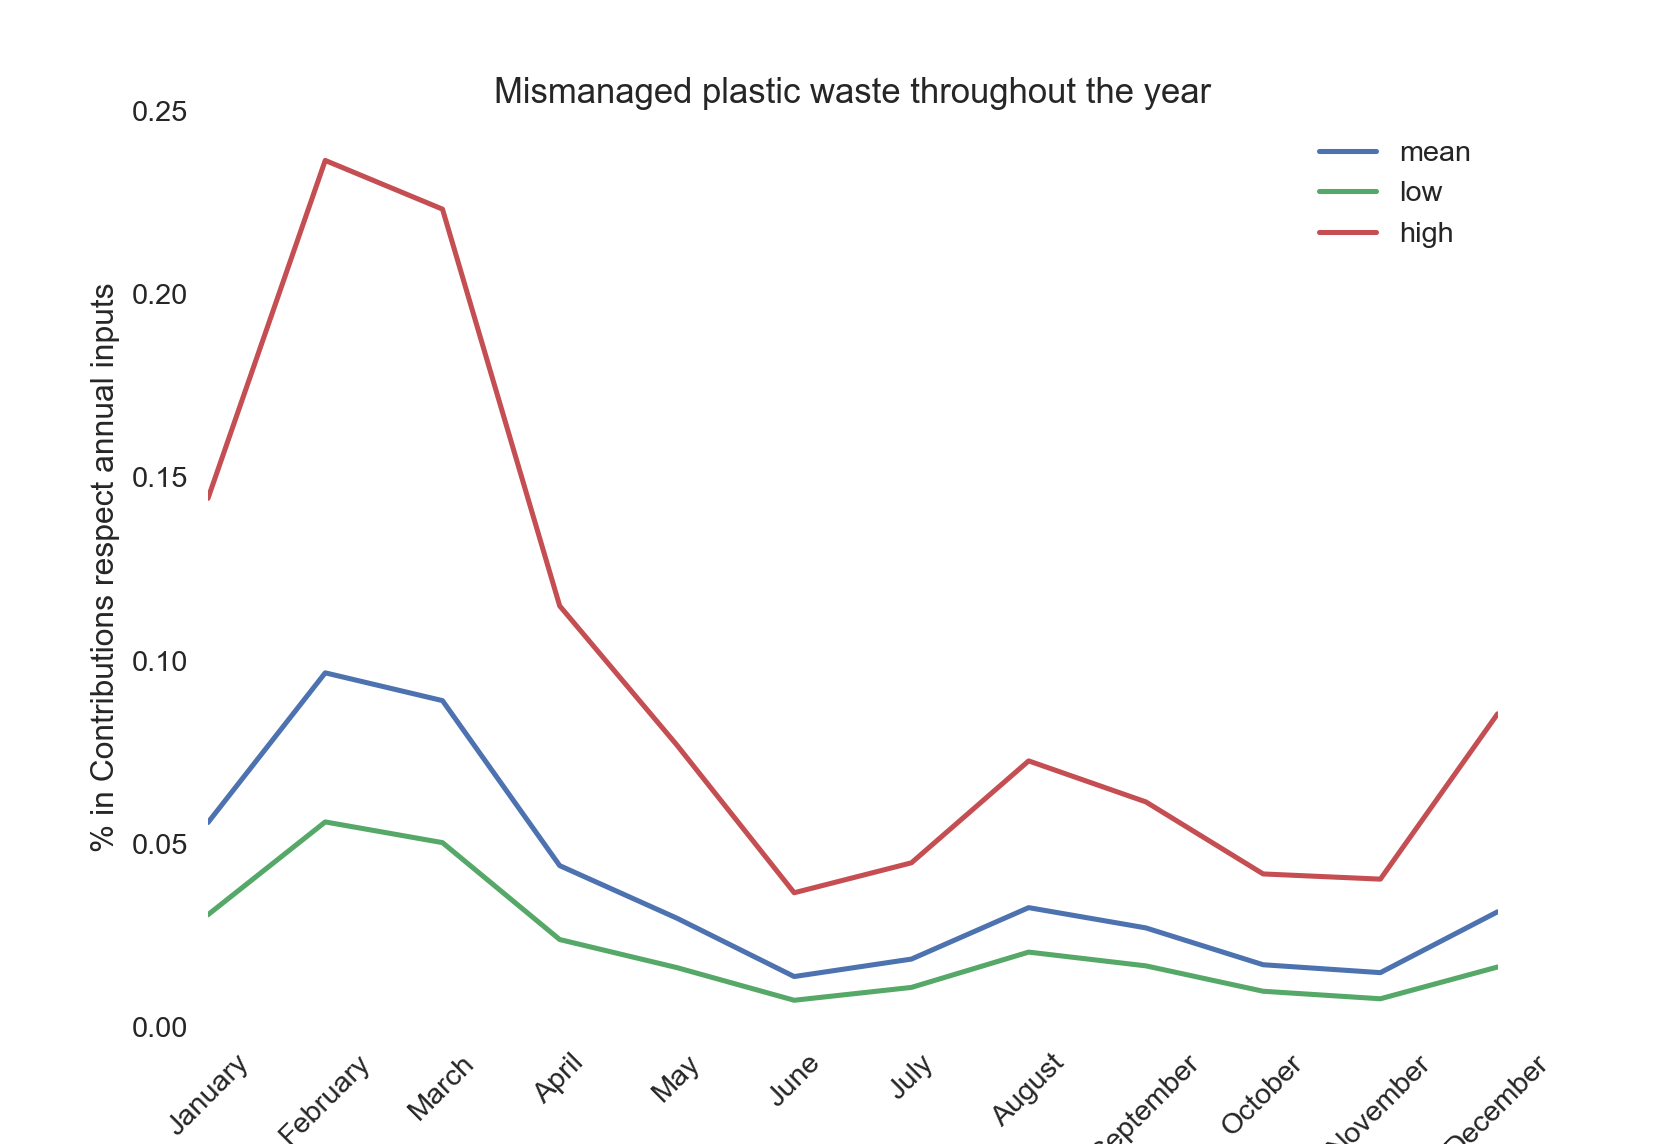

In [72]:
plt.style.use('seaborn-white')
plt.figure()
months=['January','February','March','April','May','June','July','August','September','October','November','December']

plt.title('Mismanaged plastic waste throughout the year')
plt.plot(months,df.mean().values,label='mean')
plt.plot(months,df2.mean().values,label='low',c='g')
plt.plot(months,df3.mean().values,label='high',c='r')
plt.legend()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.ylabel(' % in Contributions respect annual inputs')
plt.xticks(rotation=45)
plt.show()
plt.savefig('percent_in_year')

In [55]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']
